In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.simplefilter("ignore")

In [2]:
train = pd.read_csv("data/train.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
some_digit = train.iloc[1:2,1:]

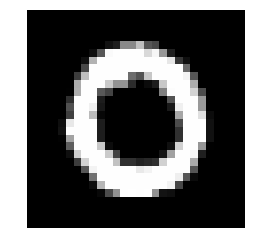

In [5]:
plt.imshow(some_digit.values.reshape(28,28), cmap="gist_gray")
plt.axis("off")
plt.show()

In [6]:
train.values.shape

(42000, 785)

In [7]:
import tensorflow as tf

In [8]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of the input image
    n_W0 -- scalar, width of the input image
    n_C0 -- scalar, number of channels of input
    n_y -- scalar, number of classes
    
    Returns:
    X -- placeholder for the input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """
    
    X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, [None, n_y])
    
    return X, Y

In [9]:
X, Y = create_placeholders(100, 28, 28, 10)
print("Tensor X:", X)
print("Tensor Y:", Y)

Tensor X: Tensor("Placeholder:0", shape=(?, 100, 28, 28), dtype=float32)
Tensor Y: Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


In [10]:
def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                       W1 : [4, 4, 3, 8]
                       W2 : [2, 2, 8, 16]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    tf.set_random_seed(1)
    W1 = tf.get_variable("W1", [4,4,3,8], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2", [2,2,8,16], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    
    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters
    

In [11]:
tf.reset_default_graph()
with tf.Session() as testing_sess:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    testing_sess.run(init)
    print("W1 :" ,parameters["W1"].eval()[1,1,1])
    print("W2 :" ,parameters["W2"].eval()[1,1,1])
    

W1 : [ 0.00131723  0.1417614  -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W2 : [-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]


In [13]:
def forward_propagation(X, parameters):
    """ 
    Implements the forward propagation for the model LeNet:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> RELU -> FLATTEN -> FULLYCONNECTED
    
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing the parameters "W1" , "W2"
                  the shapes are given in initialize parameters
    
    Returns:
    Z3 -- the output of the linear unit
    
    """
    
    W1 = parameters ["W1"]
    W2 = parameters ["W2"]
    
    #CONV2D stride = 1 padding valid
    Z1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding="VALID")
    
    #RELU
    A1 = tf.nn.relu(Z1)
    
    #MAXPOOL window 2x2, stride = 2, padding 'VALID'
    P1 = tf.nn.max_pool(A1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    #CONV2D: filters W2, stride 1, padding 'Valid'
    Z2 = tf.nn.conv2d(P1, W2, strides=[1,1,1,1], padding="VALID")
    
    #RELU
    A2 = tn.nn.relu(Z2)
    
    #MAXPOOL window 2x2, stride = 2, padding 'VALID'
    P2 = tf.nn.max_pool(A2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    #Flatten
    P2 = tf.contrib.layers.flatten(P2)
    
    #Fully Connected
    Z3 = tf.contrib.layers.fully_connected(P2, 9, activation_fn=None)
    
    return Z3    